In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [4]:
iris = sns.load_dataset("iris")

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [75]:
iris_norm = iris
iris_norm = normalize(iris.drop("species",axis=1))
iris_norm = pd.DataFrame(iris_norm,columns=iris.columns.drop("species"))
iris_norm = pd.concat([iris_norm,iris["species"]],axis=1)
iris_norm

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.803773,0.551609,0.220644,0.031521,setosa
1,0.828133,0.507020,0.236609,0.033801,setosa
2,0.805333,0.548312,0.222752,0.034269,setosa
3,0.800030,0.539151,0.260879,0.034784,setosa
4,0.790965,0.569495,0.221470,0.031639,setosa
...,...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699,virginica
146,0.729654,0.289545,0.579090,0.220054,virginica
147,0.716539,0.330710,0.573231,0.220474,virginica
148,0.674671,0.369981,0.587616,0.250281,virginica


In [91]:
iris_standard = iris.drop("species",axis=1)
scaler = StandardScaler()
scaler.fit(iris_standard)
iris_standard = scaler.transform(iris_standard)
iris_standard = pd.DataFrame(iris_standard)
iris_standard = pd.concat([iris_standard,iris["species"]],axis=1)
iris_standard.columns = iris.columns
iris_standard

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


In [92]:
iris_standard.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [93]:
iris_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.751400,0.405174,0.454784,0.141071
std,0.044368,0.105624,0.159986,0.077977
min,0.653877,0.238392,0.167836,0.014727
25%,0.715261,0.326738,0.250925,0.048734
50%,0.754883,0.354371,0.536367,0.164148
75%,0.786912,0.527627,0.580025,0.197532
max,0.860939,0.607125,0.636981,0.280419


In [94]:
iris_standard.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [95]:
iris_norm.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.734884,-0.866379,-0.898895
sepal_width,0.734884,1.000000,-0.965108,-0.897886
petal_length,-0.866379,-0.965108,1.000000,0.948639
petal_width,-0.898895,-0.897886,0.948639,1.000000


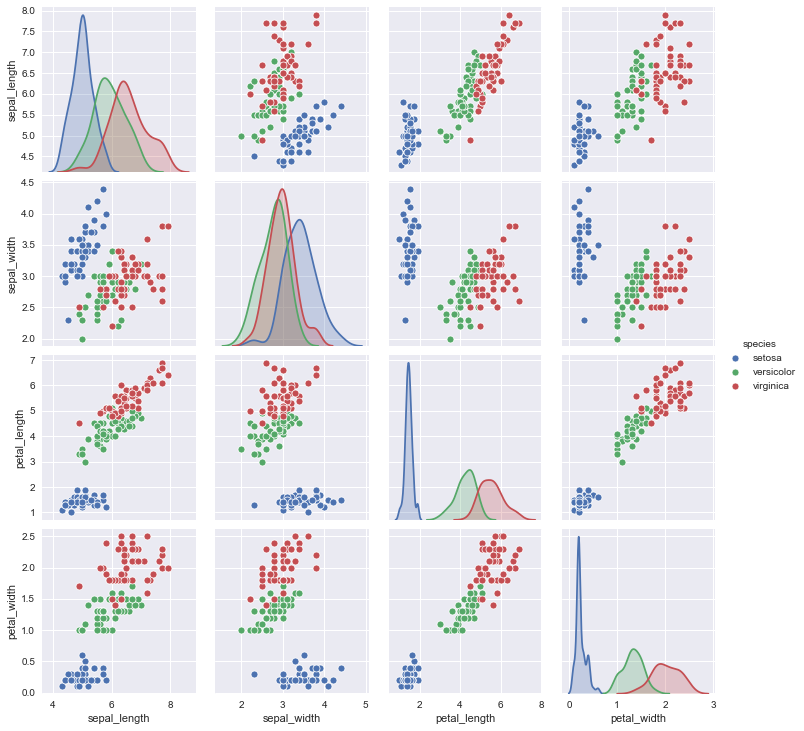

In [116]:
sns.pairplot(iris,hue="species")

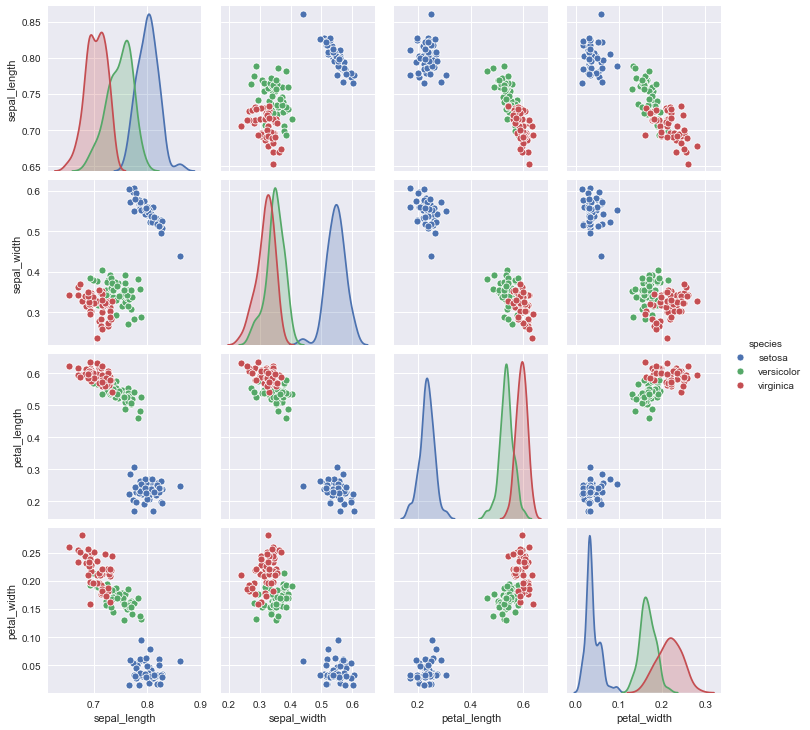

In [103]:
sns.pairplot(iris_norm,hue="species")

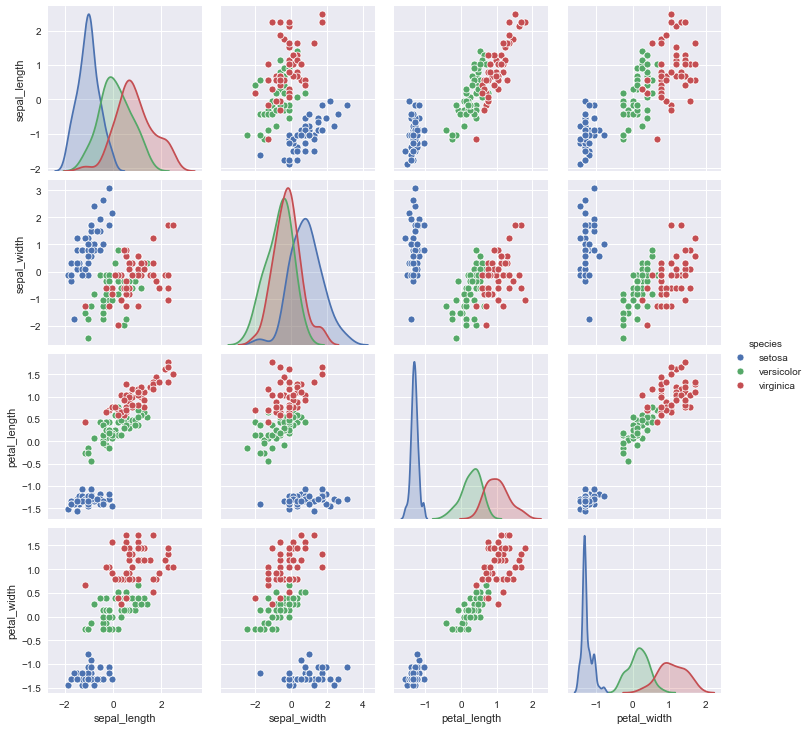

In [104]:
sns.pairplot(iris_standard,hue="species")

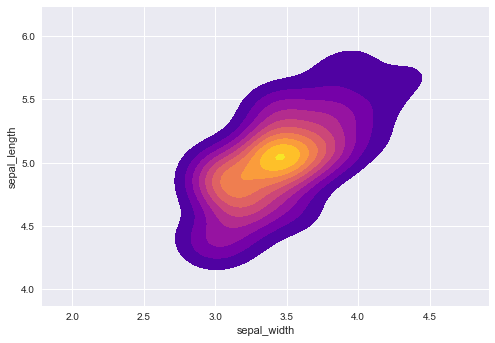

In [125]:
setosa=iris[iris["species"]=="setosa"]

sns.kdeplot(setosa["sepal_width"],setosa["sepal_length"],
            cmap="plasma",
            shade=True,
            shade_lowest=False)

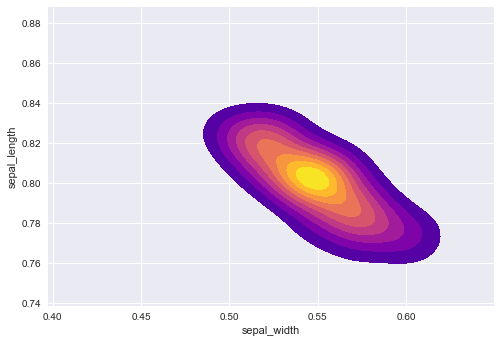

In [126]:
setosa_norm=iris_norm[iris_norm["species"]=="setosa"]

sns.kdeplot(setosa_norm["sepal_width"],setosa_norm["sepal_length"],
            cmap="plasma",
            shade=True,
            shade_lowest=False)

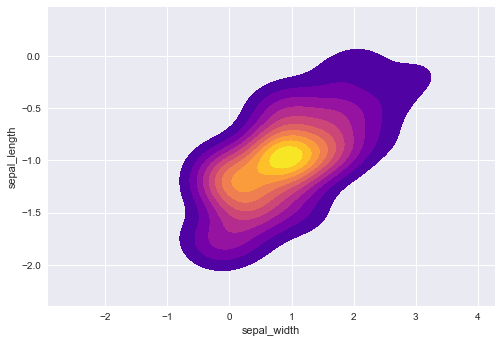

In [127]:
setosa_standard=iris_standard[iris_standard["species"]=="setosa"]

sns.kdeplot(setosa_standard["sepal_width"],
            setosa_standard["sepal_length"],
            cmap="plasma",
            shade=True,
            shade_lowest=False)

# Train Test Split

In [130]:
from sklearn.model_selection import train_test_split

In [133]:
X = iris.drop("species",axis=1)
y = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [134]:
X_norm = iris_norm.drop("species",axis=1)
y_norm = iris_norm["species"]

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.3)

In [135]:
X_stan = iris_standard.drop("species",axis=1)
y_stan = iris_standard["species"]

X_train_stan, X_test_stan, y_train_stan, y_test_stan = train_test_split(X_stan, y_stan, test_size=0.3)

In [136]:
from sklearn.svm import SVC

In [139]:
svc_model = SVC()
svc_model_norm = SVC()
svc_model_stan = SVC()

In [140]:
svc_model.fit(X_train,y_train)
svc_model_norm.fit(X_train_norm,y_train_norm)
svc_model_stan.fit(X_train_stan,y_train_stan)

SVC()

In [143]:
pred = svc_model.predict(X_test)
pred_norm = svc_model_norm.predict(X_test_norm)
pred_stan = svc_model_stan.predict(X_test_stan)

# Model Evaluation

In [155]:
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error

### Classification report

In [144]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [145]:
print(classification_report(y_test_norm,pred_norm))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        16
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [146]:
print(classification_report(y_test_stan,pred_stan))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.92      0.92        12
   virginica       0.95      0.95      0.95        21

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Confusion matrix

In [147]:
print(confusion_matrix(y_test,pred))

[[14  0  0]
 [ 0 14  0]
 [ 0  0 17]]


In [148]:
print(confusion_matrix(y_test_norm,pred_norm))

[[16  0  0]
 [ 0 15  1]
 [ 0  0 13]]


In [149]:
print(confusion_matrix(y_test_stan,pred_stan))

[[12  0  0]
 [ 0 11  1]
 [ 0  1 20]]


# GridSearch

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
param_grid = {"C":[0.1,1,10,100],"gamma":[1,0.1,0.01,0.001]}

In [163]:
grid = GridSearchCV(SVC(),param_grid=param_grid,verbose=10)
grid.fit(X_train,y_train)

In [165]:
grid_norm = GridSearchCV(SVC(),param_grid=param_grid,verbose=10)
grid_norm.fit(X_train_norm,y_train_norm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.619, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.714, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.333, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.333, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.381, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.381, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.667, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.667, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.667, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.667, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=10)

In [166]:
grid_stan = GridSearchCV(SVC(),param_grid=param_grid,verbose=10)
grid_stan.fit(X_train_stan,y_train_stan)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.857, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.714, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.857, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.810, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.333, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.333, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.333, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=1.000, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.952, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.952, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.952, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=10)

In [167]:
grid_pred =  grid.predict(X_test)
grid_pred_norm = grid.predict(X_test_norm)
grid_pred_stan = grid.predict(X_test_stan)

In [168]:
print(confusion_matrix(y_test,grid_pred))

[[14  0  0]
 [ 0 13  1]
 [ 0  0 17]]


In [169]:
print(confusion_matrix(y_test_norm,grid_pred_norm))

[[16  0  0]
 [16  0  0]
 [13  0  0]]


In [170]:
print(confusion_matrix(y_test_stan,grid_pred_stan))

[[12  0  0]
 [12  0  0]
 [12  8  1]]


In [171]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.93      0.96        14
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [172]:
print(classification_report(y_test_norm,grid_pred_norm))

              precision    recall  f1-score   support

      setosa       0.36      1.00      0.52        16
  versicolor       0.00      0.00      0.00        16
   virginica       0.00      0.00      0.00        13

    accuracy                           0.36        45
   macro avg       0.12      0.33      0.17        45
weighted avg       0.13      0.36      0.19        45



C:\Users\nmrei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
print(classification_report(y_test_stan,grid_pred_stan))

              precision    recall  f1-score   support

      setosa       0.33      1.00      0.50        12
  versicolor       0.00      0.00      0.00        12
   virginica       1.00      0.05      0.09        21

    accuracy                           0.29        45
   macro avg       0.44      0.35      0.20        45
weighted avg       0.56      0.29      0.18        45

